# A Deep Dive into Betting Statistics of the NFL

## Jonathan Mei and Eddy Qiu

## Introduction

The National Football League (NFL) is the premier American football league of the United States. The league boasts 32 teams overall, split into 2 divisions, the NFC and the AFC. Each conference is further split into 4 divisions of 4 clubs. Each team will engage in a preseason, regular season, and postseason. In this analysis, we will focus on the regular season and postseason as the preseason does not count on a team’s win-loss record and is usually not taken as seriously as the games after. Each game attracts a sea of fans in person and through the television, all eager to see how a rumble between two teams turns out. 

Fans who are really into these games engage in sports betting, believing that their expertise translates into possible monetary gain. Sports betting is where a bettor puts their money on a prediction, cashing out a certain amount if their prediction is realized. In this age of increased access to data and analysis methods, betting strategies and statistics have become much more rigorous.

Three main bets are popular on betting websites: the spread, the over/under, and the money line. 
Spread - The difference between the final score of the two teams, or how much better one team is over another. For example, when you bet on a spread X for Team A vs Team B respectively, you win if Team A wins by over X points, lose if Team A loses by more than 1 point, and get your money back if they tie (called a “push”)
Over/Under - The sum of points between both teams in a game. Again, if the final score is equal to the over/under, there is a push and both betting parties get their money back.
Moneyline - Winner/Loser of the game

Each wager has odds set by oddsmakers. In essence, there are usually positive odds and negative odds. If a wager has negative odds, such as -200, this means that a bet of $200, if predicted correctly, will profit $100. On the other hand, if a wager has positive odds, such as +300, this means that a bet of $100 will profit $300. Thus, a wager favoring a team with positive odds makes that team an “underdog” and vice versa.

There are a multitude of factors that go into the outcome of a game. A well-known trend is the “home-field advantage,” shown by a significant majority of lines favoring the home team in sports betting. In this comprehensive analysis, we will take a deeper dive into other possible factors such as _________insert here _________ on the spread, over/under, and moneyline.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

We sourced this data from https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data/data under the CC **BY-NC-SA 4.0** license.

In [34]:
stadiums = pd.read_csv('nfl_stadiums.csv')
teams = pd.read_csv('nfl_teams.csv')
scores = pd.read_csv('nfl_scores.csv')

Removed NA entries where betting odds were unavaiable. Then added two columns, score_diff which measures the difference between the scores of the away team to the home team, and total_score which is the sum of both scores.

In [35]:
scores = scores.dropna(subset=['team_favorite_id', 'spread_favorite', 'over_under_line'])
scores['score_diff'] = scores['score_away'] - scores['score_home']
scores['total_score'] = scores['score_away'] + scores['score_home']
scores.head(5)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_diff,total_score
350,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN,-19,47
538,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain,9,23
727,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain,-16,30
916,1/17/1971,1970,Superbowl,True,Baltimore Colts,16,13,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN,-3,29
1105,1/16/1972,1971,Superbowl,True,Dallas Cowboys,24,3,Miami Dolphins,DAL,-6.0,34,Tulane Stadium,True,34.0,18.0,40.0,NaN,-21,27


Then we simplfied the team_home and team_away columns by replacing their full names with an abbreviated code.

In [36]:
for index,row in scores.iterrows():
    scores.at[index,'team_home'] = teams.loc[teams['team_name'] == row['team_home']].iat[0,2]
    scores.at[index,'team_away'] = teams.loc[teams['team_name'] == row['team_away']].iat[0,2]
scores.head(5)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_diff,total_score
350,1/14/1968,1967,Superbowl,True,GB,33,14,LVR,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN,-19,47
538,1/12/1969,1968,Superbowl,True,IND,7,16,NYJ,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain,9,23
727,1/11/1970,1969,Superbowl,True,KC,23,7,MIN,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain,-16,30
916,1/17/1971,1970,Superbowl,True,IND,16,13,DAL,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN,-3,29
1105,1/16/1972,1971,Superbowl,True,DAL,24,3,MIA,DAL,-6.0,34,Tulane Stadium,True,34.0,18.0,40.0,NaN,-21,27


Added columns winner and loser filled in win respective team codes or "tie" if it was a tie.

In [38]:
scores['winner'] = "Tie"
scores['loser'] = "Tie"
for index,row in scores.iterrows():
    if row['score_home'] > row['score_away']:
        scores.at[index,'winner'] = scores.at[index,'team_home']
        scores.at[index,'loser'] = scores.at[index,'team_away']
    elif row['score_home'] < row['score_away']:
        scores.at[index,'winner'] = scores.at[index,'team_away']
        scores.at[index,'loser'] = scores.at[index,'team_home']   
scores.head(5)

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_diff,total_score,winner,loser
350,1/14/1968,1967,Superbowl,True,GB,33,14,LVR,GB,-13.5,...,Orange Bowl,True,60.0,12.0,74.0,NaN,-19,47,GB,LVR
538,1/12/1969,1968,Superbowl,True,IND,7,16,NYJ,IND,-18.0,...,Orange Bowl,True,66.0,12.0,80.0,rain,9,23,NYJ,IND
727,1/11/1970,1969,Superbowl,True,KC,23,7,MIN,MIN,-12.0,...,Tulane Stadium,True,55.0,14.0,84.0,rain,-16,30,KC,MIN
916,1/17/1971,1970,Superbowl,True,IND,16,13,DAL,IND,-2.5,...,Orange Bowl,True,59.0,11.0,60.0,NaN,-3,29,IND,DAL
1105,1/16/1972,1971,Superbowl,True,DAL,24,3,MIA,DAL,-6.0,...,Tulane Stadium,True,34.0,18.0,40.0,NaN,-21,27,DAL,MIA


Changed special schedule weeks with the respective number form.

In [40]:
for index, row in scores.iterrows():
    if row['schedule_week'] == 'Superbowl':
        scores.at[index,'schedule_week'] = 22
    elif row['schedule_week'] == 'Conference':
        scores.at[index,'schedule_week'] = 21
    elif row['schedule_week'] == 'Wildcard':
        scores.at[index,'schedule_week'] = 20
    elif row['schedule_week'] == 'Division':
        scores.at[index,'schedule_week'] = 19
    else:
        scores.at[index,'schedule_week'] = int(row['schedule_week'])

Added a column for month, dropping the schedule_date column

In [41]:
scores['month'] = pd.to_datetime(scores['schedule_date']).dt.month_name()      
scores = scores.drop(columns=['schedule_date'])
scores.head(5)

KeyError: 'schedule_date'

In order to calculate win percentages, sort chronologically by schedule_season and schedule_week.

In [43]:
scores = scores.sort_values(by=['schedule_season', 'schedule_week'], ascending=True)
scores.reset_index(drop=True, inplace=True)
scores.head(5)

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,score_diff,total_score,winner,loser,month
0,1967,22,True,GB,33,14,LVR,GB,-13.5,43,...,True,60.0,12.0,74.0,NaN,-19,47,GB,LVR,January
1,1968,22,True,IND,7,16,NYJ,IND,-18.0,40,...,True,66.0,12.0,80.0,rain,9,23,NYJ,IND,January
2,1969,22,True,KC,23,7,MIN,MIN,-12.0,39,...,True,55.0,14.0,84.0,rain,-16,30,KC,MIN,January
3,1970,22,True,IND,16,13,DAL,IND,-2.5,36,...,True,59.0,11.0,60.0,NaN,-3,29,IND,DAL,January
4,1971,22,True,DAL,24,3,MIA,DAL,-6.0,34,...,True,34.0,18.0,40.0,NaN,-21,27,DAL,MIA,January


Calculate win percentage for the home and away teams by summing previous records, adding 1 for a win or loss

In [44]:
scores['home_win_percentage'] = 0.0

for index, row in scores.iterrows():
    prev_games = scores[(scores['schedule_season'] == row['schedule_season']) & (scores['schedule_week'] < row['schedule_week'])]
    games_won_home = prev_games[prev_games['winner'] == row['team_home']]['winner'].count()
    games_loss_home = prev_games[prev_games['loser'] == row['team_home']]['loser'].count()
    if games_loss_home + games_won_home > 0:
        scores.at[index,'home_win_percentage'] = games_won_home / (games_won_home + games_loss_home)

In [45]:
scores['away_win_percentage'] = 0.0

for index, row in scores.iterrows():    
    games_won_away = prev_games[prev_games['winner'] == row['team_away']]['winner'].count()
    games_loss_away = prev_games[prev_games['loser'] == row['team_away']]['loser'].count()
    if games_won_away + games_loss_away > 0:
        scores.at[index,'away_win_percentage'] = games_won_away / (games_won_away + games_loss_away)
scores.head(5)

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,...,weather_wind_mph,weather_humidity,weather_detail,score_diff,total_score,winner,loser,month,home_win_percentage,away_win_percentage
0,1967,22,True,GB,33,14,LVR,GB,-13.5,43,...,12.0,74.0,NaN,-19,47,GB,LVR,January,0.0,0.470588
1,1968,22,True,IND,7,16,NYJ,IND,-18.0,40,...,12.0,80.0,rain,9,23,NYJ,IND,January,0.0,0.411765
2,1969,22,True,KC,23,7,MIN,MIN,-12.0,39,...,14.0,84.0,rain,-16,30,KC,MIN,January,0.0,0.411765
3,1970,22,True,IND,16,13,DAL,IND,-2.5,36,...,11.0,60.0,NaN,-3,29,IND,DAL,January,0.0,0.666667
4,1971,22,True,DAL,24,3,MIA,DAL,-6.0,34,...,18.0,40.0,NaN,-21,27,DAL,MIA,January,0.0,0.611111


For NA values in weather_temperate, weather_wind_mph, and weather_humidity, replace with the mean of all the temperates, wind mphs, and humidities.

In [ ]:
mean_temp = scores['weather_temperature'].mean()
mean_wind = scores['weather_wind_mph'].mean()
mean_humidity = scores['weather_humidity'].mean()
values = {'weather_temperature': mean_temp, 'weather_wind_mph': mean_wind, 'weather_humidity':mean_humidity, 'weather_detail':'not_recorded'}
scores.fillna(value=values, inplace=True)
scores.head(5)

,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,...,weather_wind_mph,weather_humidity,weather_detail,score_diff,total_score,winner,loser,month,home_win_percentage,away_win_percentage
0,1967,22,True,GB,33,14,LVR,GB,-13.5,43,...,12.0,74.0,not_recorded,-19,47,GB,LVR,January,0.0,0.470588
1,1968,22,True,IND,7,16,NYJ,IND,-18.0,40,...,12.0,80.0,rain,9,23,NYJ,IND,January,0.0,0.411765
2,1969,22,True,KC,23,7,MIN,MIN,-12.0,39,...,14.0,84.0,rain,-16,30,KC,MIN,January,0.0,0.411765
3,1970,22,True,IND,16,13,DAL,IND,-2.5,36,...,11.0,60.0,not_recorded,-3,29,IND,DAL,January,0.0,0.666667
4,1971,22,True,DAL,24,3,MIA,DAL,-6.0,34,...,18.0,40.0,not_recorded,-21,27,DAL,MIA,January,0.0,0.611111


Now we start performing some exploratory data analysis (EDA).

In [46]:
def plot(x,y, type):
    x_vals = sorted(scores[x].unique())
    y_vals = [(scores[scores[x] == a][y].mean()) for a in x_vals]
    
    fig = plt.figure(figsize = (12, 5))
    if type == 'bar':
        bars = plt.bar(x_vals, y_vals)
        for bar, label in zip(bars, y_vals): 
            height = bar.get_height()
            fontsize = 10
            if x == 'schedule_season':
                fontsize = 7
            plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.2f}', fontsize=fontsize, ha='center', va='bottom') 
    elif type == 'line':  
        plt.plot(x_vals, y_vals)
    else:
        plt.scatter(scores[x], scores[y])
    plt.xlabel(x)
    ylabel = ('' if type == 'scatter' else 'Average ') + y
    plt.ylabel(ylabel)
    plt.title(ylabel + ' vs ' + x)
        
    plt.show()

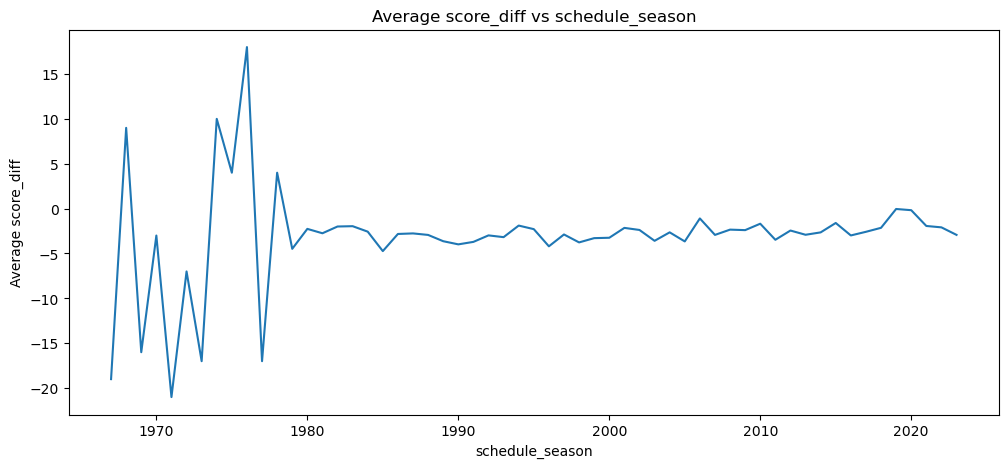

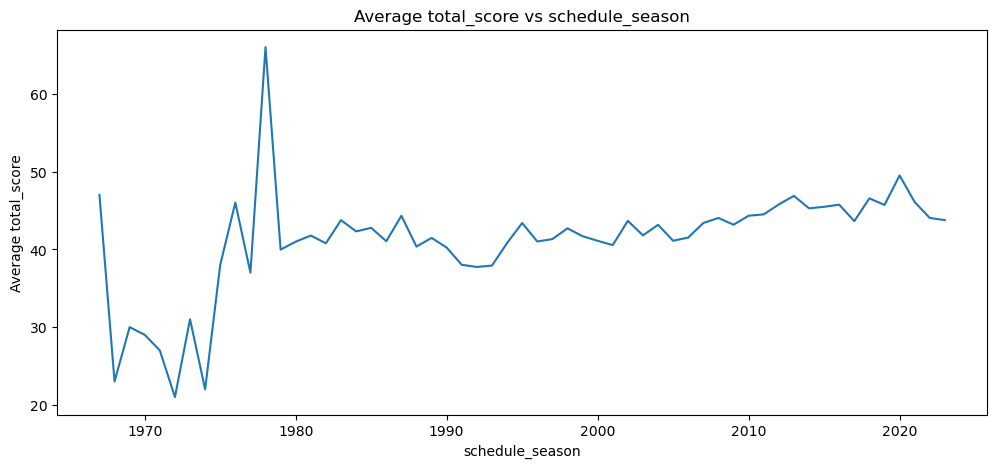

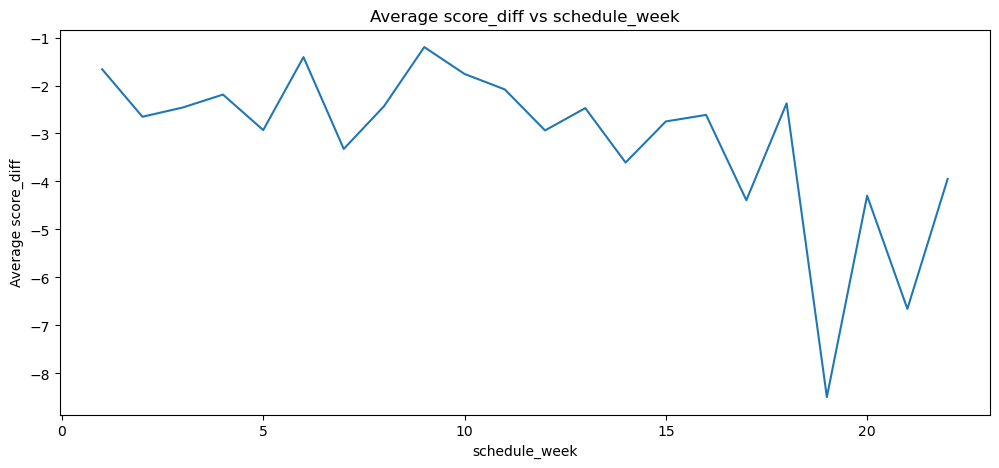

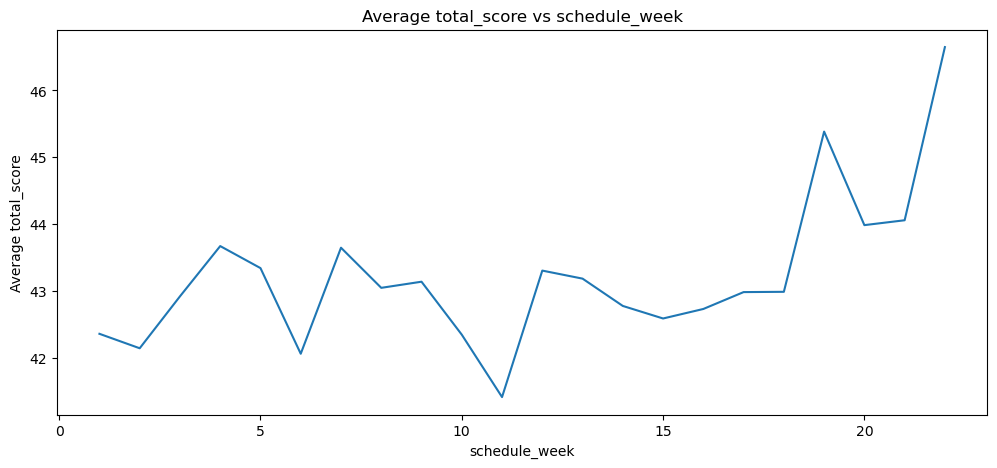

In [47]:
x_cols_line = ['schedule_season', 'schedule_week']
y_cols = ['score_diff', 'total_score']

for x in x_cols_line:
    for y in y_cols:
        plot(x,y, 'line')

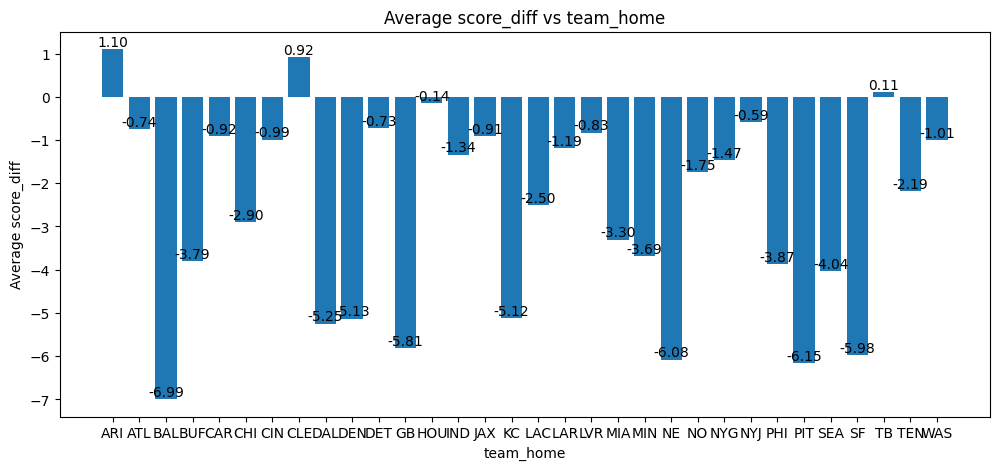

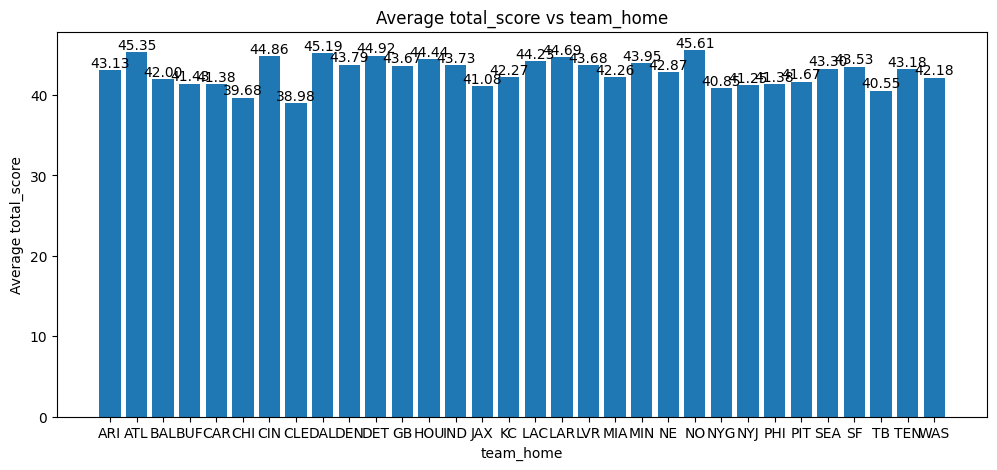

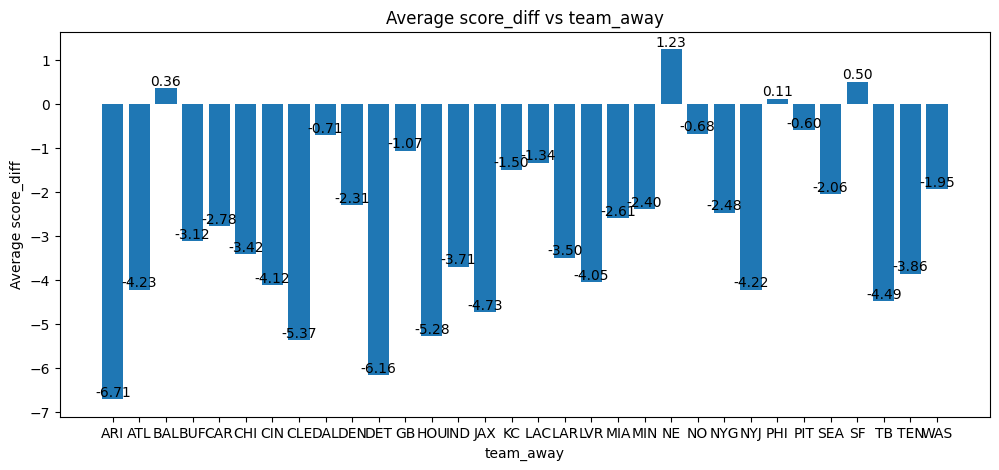

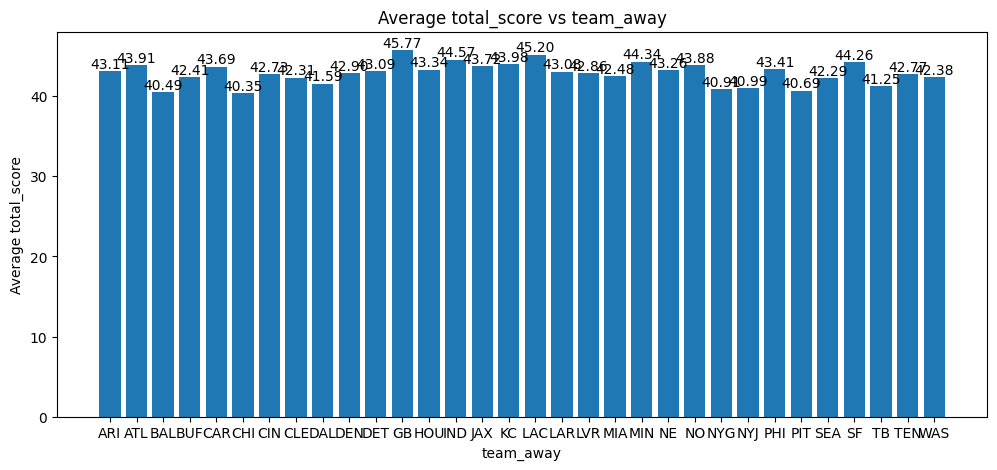

In [14]:
x_cols_bar = ['team_home', 'team_away']
for x in x_cols_bar:
    for y in y_cols:
        plot(x,y, 'bar')

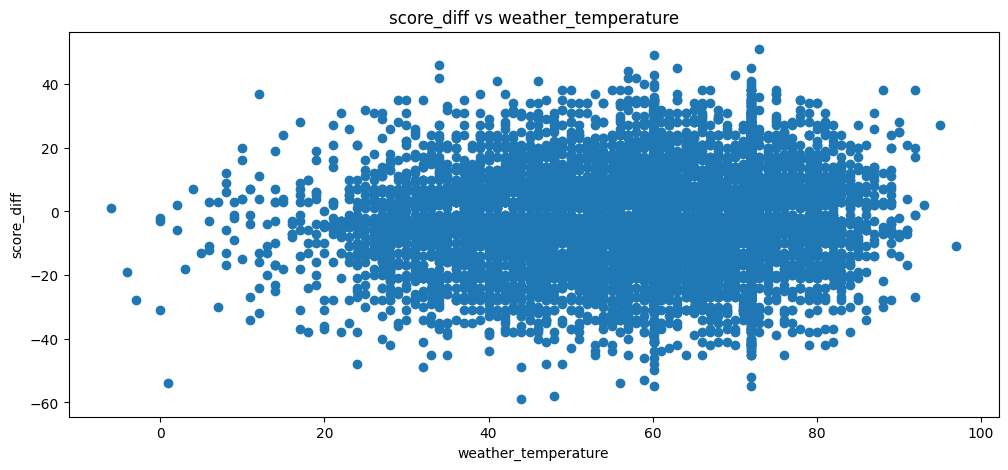

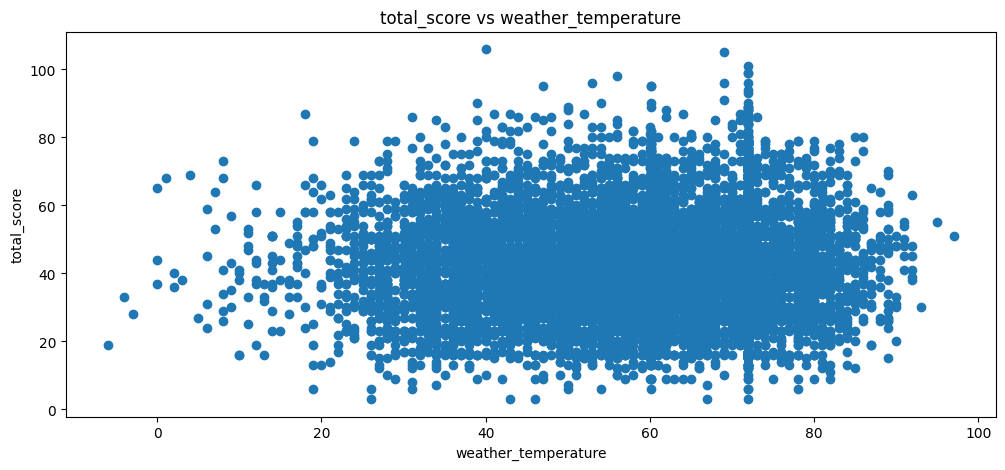

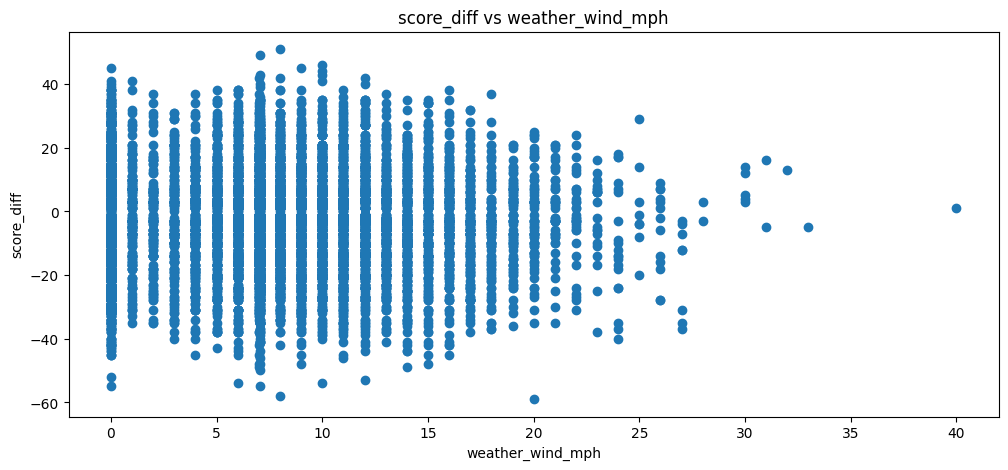

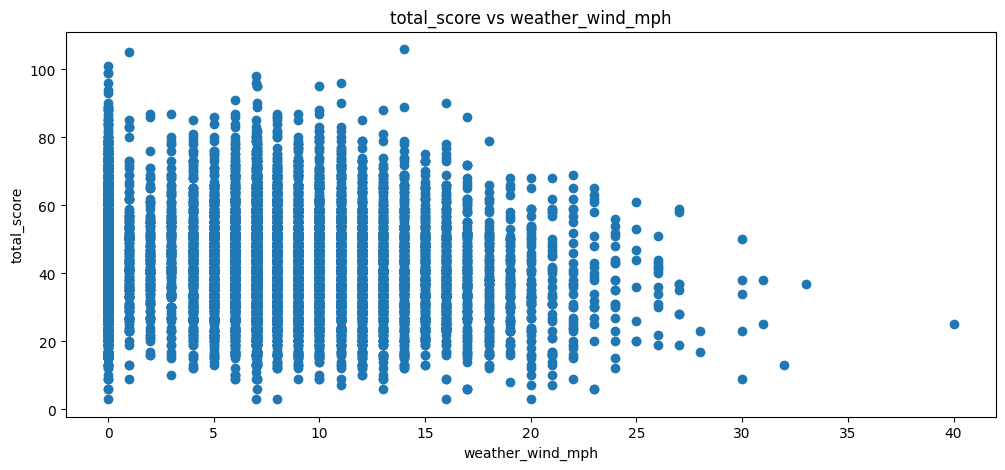

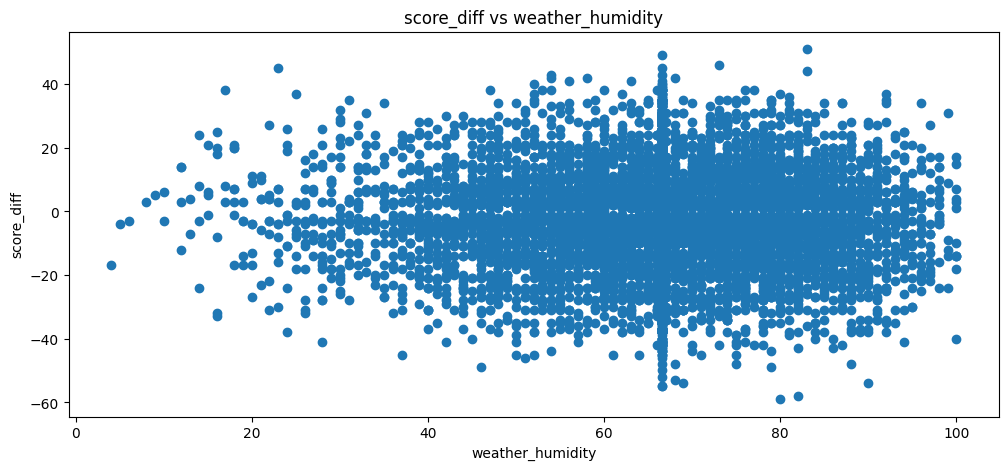

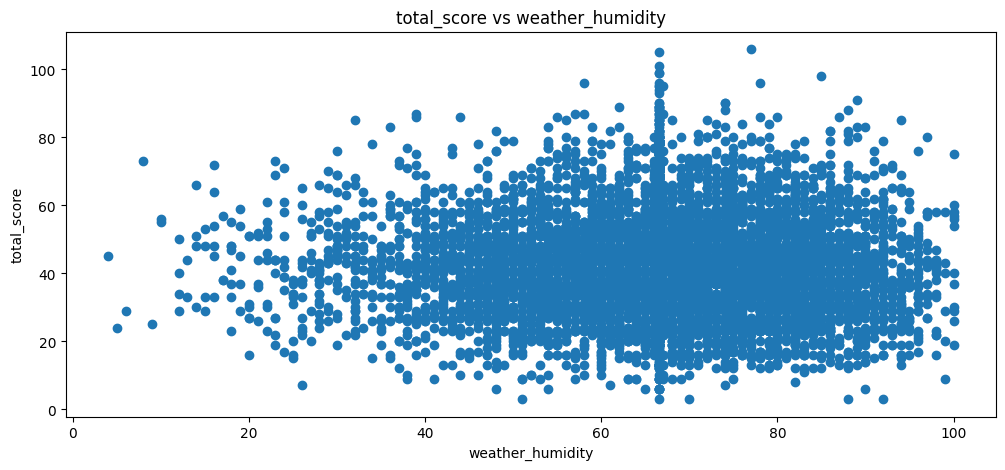

In [15]:

x_cols_scatter = ['weather_temperature', 'weather_wind_mph', 'weather_humidity']
for x in x_cols_scatter:
    for y in y_cols:
        plot(x,y, 'scatter')